# Car Sales Analysis

__Sypnosis__: The dataset contain multiple car sales report with relevant features. The usual prediction is that if that person has more Annual Income, then that person would potentially buy a car with higher price which follows simple linear regression. However, this may not be the case since the dataset only include the price of the car bought for each row and not the price total of all the cars the person owned, which can be non-linear (since a person who has high annual income does not necessary mean that he/she will buy expensive cars).

_One person can also buy multiple cars in this dataset_
_The data of transaction is from 2022 to the end of 2023_

Some of the applications and use cases for this data analysis are:
+ Market Analysis
+ Forecasting and Predictive Analysis
+ Supply Chain and Inventory Optimization

#### Import libraries

In [1]:
import os
import pandas as pd
import opendatasets as od
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Load and store the Data

In [ ]:
# Download dataset from Kaggle
dataset = 'https://www.kaggle.com/datasets/missionjee/car-sales-report'
od.download(dataset)

In [2]:
data_dir = 'data/carSalesData.csv'
os.listdir('data')

['carSalesData.csv']

In [3]:
# Load dataset
df = pd.read_csv(data_dir)
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


## Data Cleaning

_Since we are focused on the analysis of sales we may remove irrelevant columns_

In [4]:
# Date might be necessary for data exploration, but we will remove it for now
column_to_remove = ['Car_id', 'Date', 'Customer Name', 'Phone', 'Dealer_No ']
df.drop(columns=column_to_remove, inplace=True)

In [5]:
df.head(5)

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


#### Check data types

In [6]:
df.dtypes

Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Body Style       object
Dealer_Region    object
dtype: object

#### Check for duplicated rows

In [7]:
print(f'Number of duplicated rows: {df[df.duplicated()].shape[0]}\nNumber of total rows: {df.shape[0]}')

Number of duplicated rows: 215
Number of total rows: 23906


In [8]:
df = df.drop_duplicates()
print(f'Number of total rows: {df.shape[0]}')

Number of total rows: 23691


#### Check for missing values

In [9]:
df.count() # Since all the rows have the same number of values, there are no missing values

Gender           23691
Annual Income    23691
Dealer_Name      23691
Company          23691
Model            23691
Engine           23691
Transmission     23691
Color            23691
Price ($)        23691
Body Style       23691
Dealer_Region    23691
dtype: int64

In [10]:
df.isnull().sum() # Check for missing values

Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

#### Detecting Outliers

<Axes: xlabel='Price ($)'>

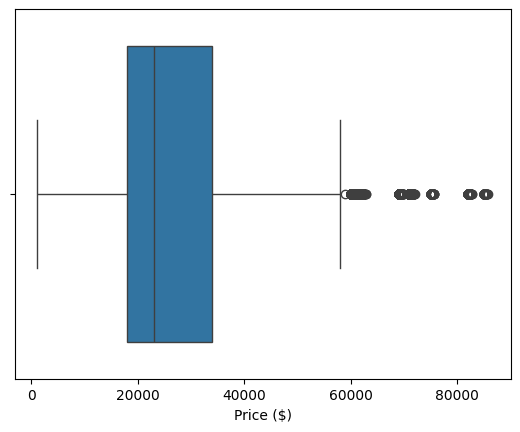

In [11]:
sns.boxplot(x=df['Price ($)'])

<Axes: xlabel='Annual Income'>

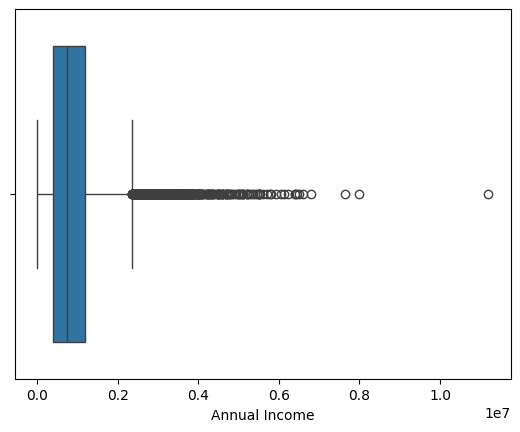

In [12]:
sns.boxplot(x=df['Annual Income'])

#### Annual Income seems to skewered too much

### Removing outliers:

In [13]:
# IQR method for removing outliers
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Removing the outliers
df_adjusted = df[~((df['Annual Income'] < (Q1 - 1.5 * IQR)) |(df['Annual Income'] > (Q3 + 1.5 * IQR)))]

In [15]:
print(f"Previous maximum Annual Income: {df['Annual Income'].max()}\nCurrent maximum Annual Income: {df_adjusted['Annual Income'].max()}")

Previous maximum Annual Income: 11200000
Current maximum Annual Income: 2360000


In [16]:
print(f"Previous shape: {df.shape}\nCurrent shape: {df_adjusted.shape}\nNumber of outliers rows dropped: {df.shape[0] - df_adjusted.shape[0]}")

Previous shape: (23691, 11)
Current shape: (22875, 11)
Number of outliers rows dropped: 816


### Exploratory Data Analysis (EDA)

The goal is to identify relevancy of each features and also overview of most data distribution

In [17]:
# Overview of adjusted dataset
df_adjusted.describe()

,Annual Income,Price ($)
count,2.287500e+04,22875.000000
mean,7.564483e+05,28068.344131
std,5.617710e+05,14780.712929
min,1.008000e+04,1200.000000
25%,3.800000e+05,18001.000000
50%,7.200000e+05,23000.000000
75%,1.104500e+06,34000.000000
max,2.360000e+06,85800.000000


#### Relevancy between Price and Annual Income

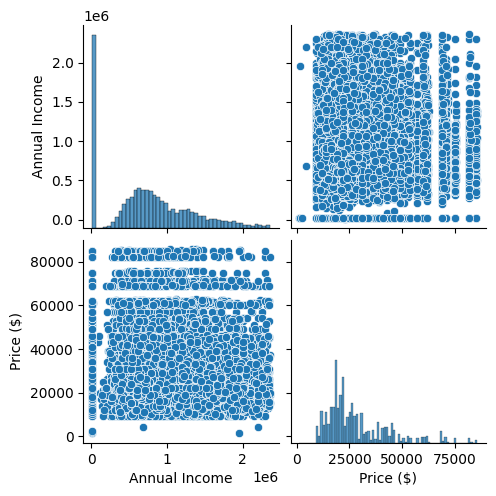

In [18]:
sns.pairplot(df_adjusted)

The relationship plotted above can already be seen as 'non-linear', the relationship between Annual Income and Prices generally increases but not in a straight line. To furthur visualize this lets use a method for non-linear relationship.

### Plotting non-linear relationship with Point Density

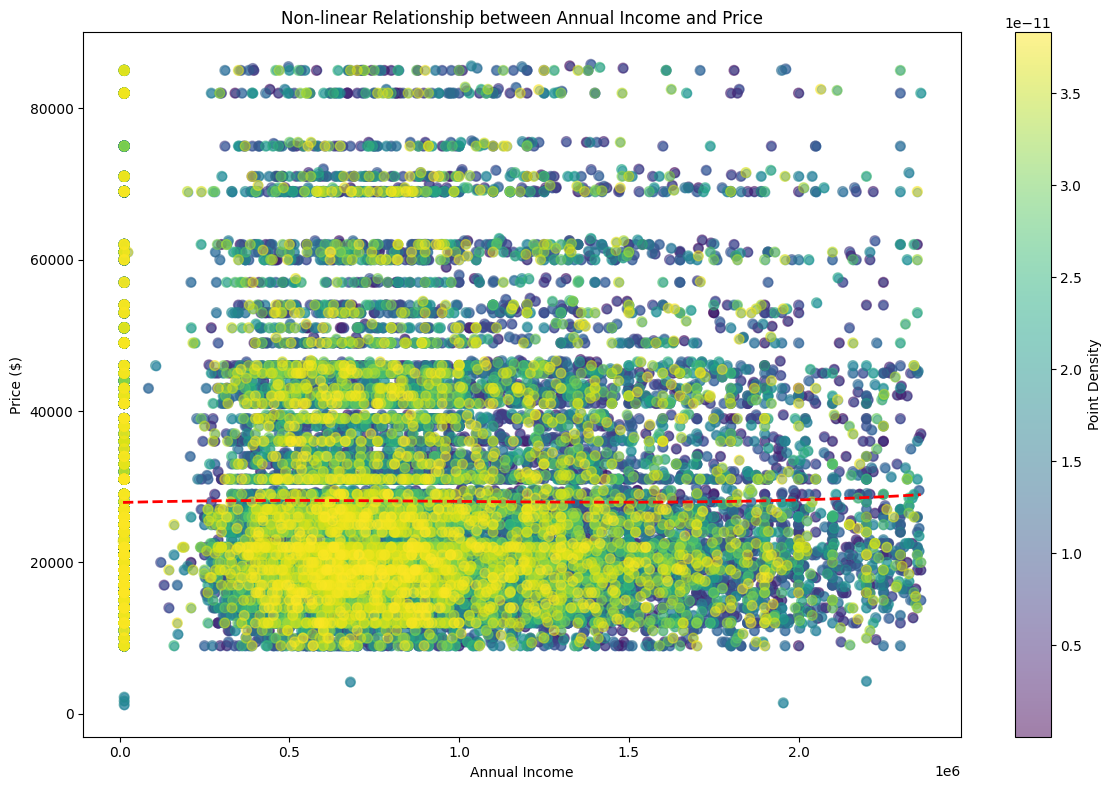

In [19]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(12, 8))
plt.scatter(df_adjusted['Annual Income'], df_adjusted['Price ($)'], alpha=0.5)

# Define the KDE function and create point distribution
xy = np.vstack([df_adjusted['Annual Income'], df_adjusted['Price ($)']])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = df_adjusted['Annual Income'], df_adjusted['Price ($)'], z[idx]

plt.scatter(x, y, c=z, s=50, alpha=0.5)

# Add trendline for non-linear relationship
z = np.polyfit(df_adjusted['Annual Income'], df_adjusted['Price ($)'], 3)
p = np.poly1d(z)
x_trend = np.linspace(df_adjusted['Annual Income'].min(), df_adjusted['Annual Income'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", linewidth=2)

plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.title('Non-linear Relationship between Annual Income and Price')
plt.colorbar(label='Point Density')

plt.tight_layout()
plt.show()

__Lets categorize each dtype 'object' to find the deeper relationship between each columns__

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_categorized = df_adjusted
for col in df_categorized.columns:
    if df_categorized[col].dtype == 'object':
        df_categorized.loc[:, col] = le.fit_transform(df_categorized[col])

In [21]:
df_categorized.dtypes

Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Body Style       object
Dealer_Region    object
dtype: object

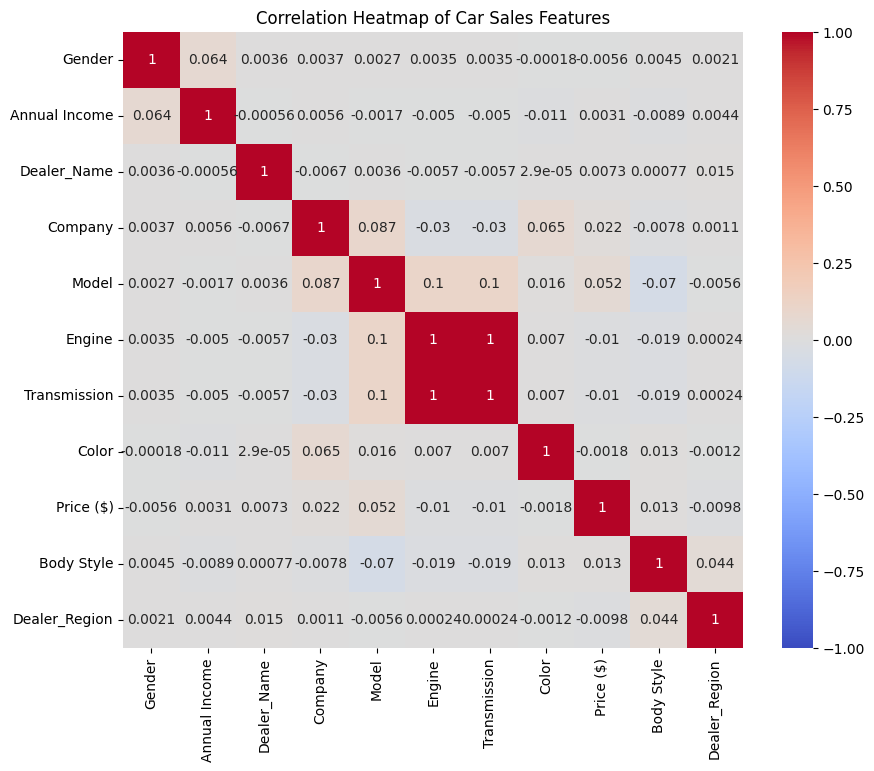

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_categorized.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Car Sales Features')
plt.show()

#### Conclusion
The correlation coefficient between Price and Annual Income is very low (0.0031), indicating almost no linear relationship between these two variables. This suggests that a customer's annual income is not a strong predictor of the price of the car they purchase. Although there are moderate correlation in this case for 'Engine' and 'Model', and also 'Model' and 'Company' which can help automotive company for optimizations.

### Now lets answer some with some data distribution!

### Which car company is the most popular?

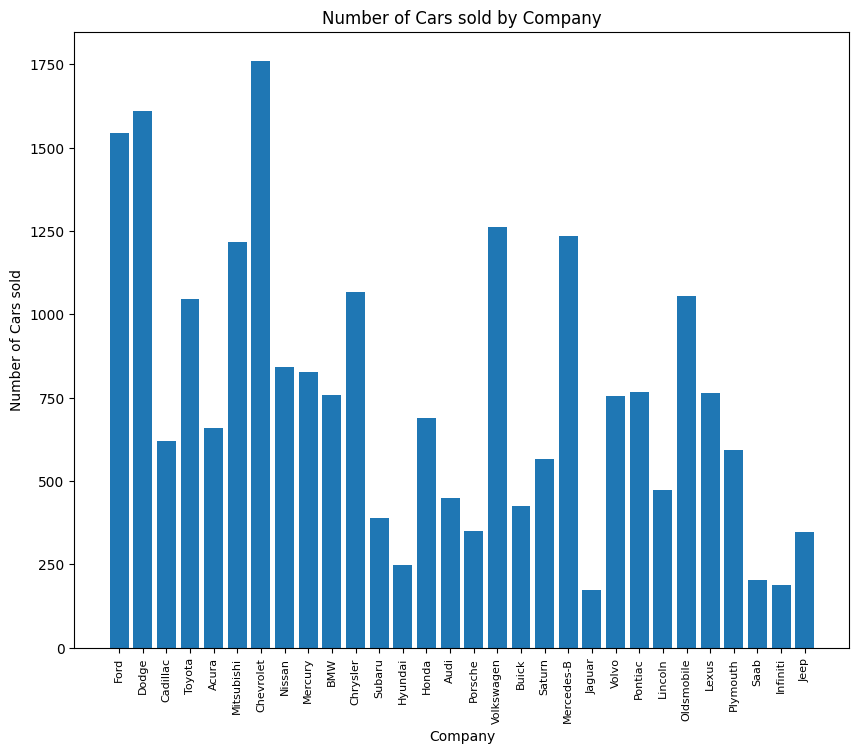

In [27]:
# Get the list of each unique company
companies = [company for company in df_adjusted["Company"].unique()]

plt.figure(figsize=(10, 8))
plt.bar(companies, df_adjusted["Company"].value_counts()[df_adjusted["Company"].unique()])
plt.title("Number of Cars sold by Company")
plt.ylabel("Number of Cars sold")
plt.xlabel("Company")
plt.xticks(companies, rotation='vertical', size=8)
plt.show()

#### Chevrolet sold the most car in this case

##### Top 10 most popular and least popular

In [28]:
print(f"The most popular car company are:\n{df_adjusted['Company'].value_counts()[:10]}")
print()
print(f"The least popular car company are:\n{df_adjusted['Company'].value_counts()[-10:]}")

The most popular car company are:
Company
Chevrolet     1760
Dodge         1609
Ford          1544
Volkswagen    1263
Mercedes-B    1234
Mitsubishi    1217
Chrysler      1066
Oldsmobile    1055
Toyota        1047
Nissan         841
Name: count, dtype: int64

The least popular car company are:
Company
Lincoln     473
Audi        449
Buick       424
Subaru      389
Porsche     349
Jeep        348
Hyundai     247
Saab        202
Infiniti    187
Jaguar      173
Name: count, dtype: int64


Text(0, 0.5, 'Cars Sold')

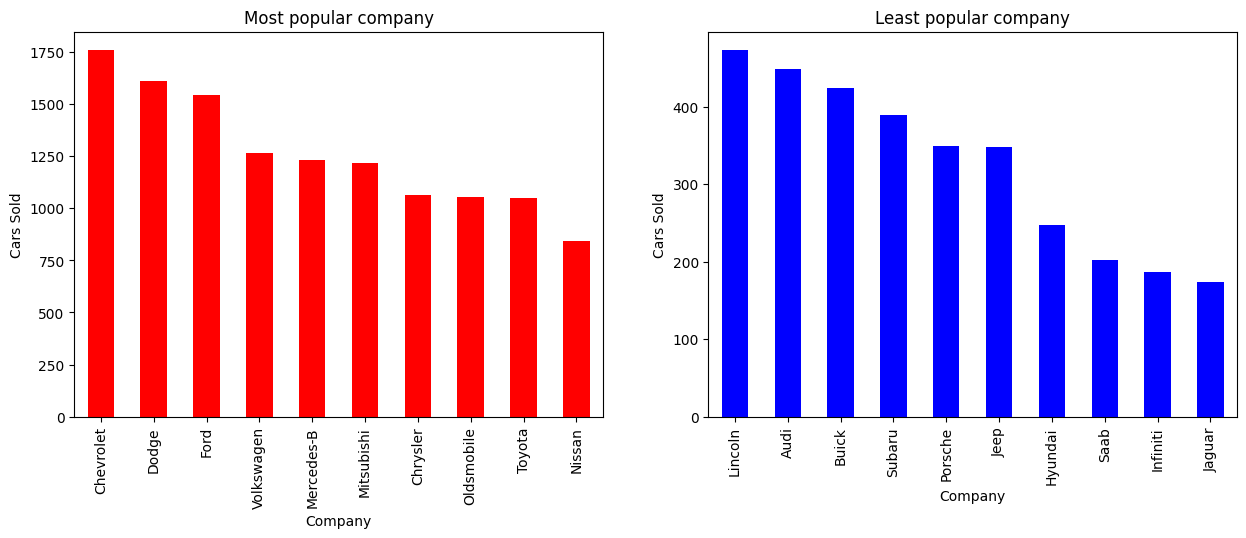

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

top_10 = df_adjusted["Company"].value_counts()[:10]
least_10 = df_adjusted["Company"].value_counts()[-10:]

top_10.plot(kind='bar', color='r', ax=ax[0])
ax[0].set_title('Most popular company')
ax[0].set_ylabel('Cars Sold')

least_10.plot(kind='bar', color='b', ax=ax[1])
ax[1].set_title('Least popular company')
ax[1].set_ylabel('Cars Sold')

### Most preferred model?

Text(0, 0.5, 'Cars Sold')

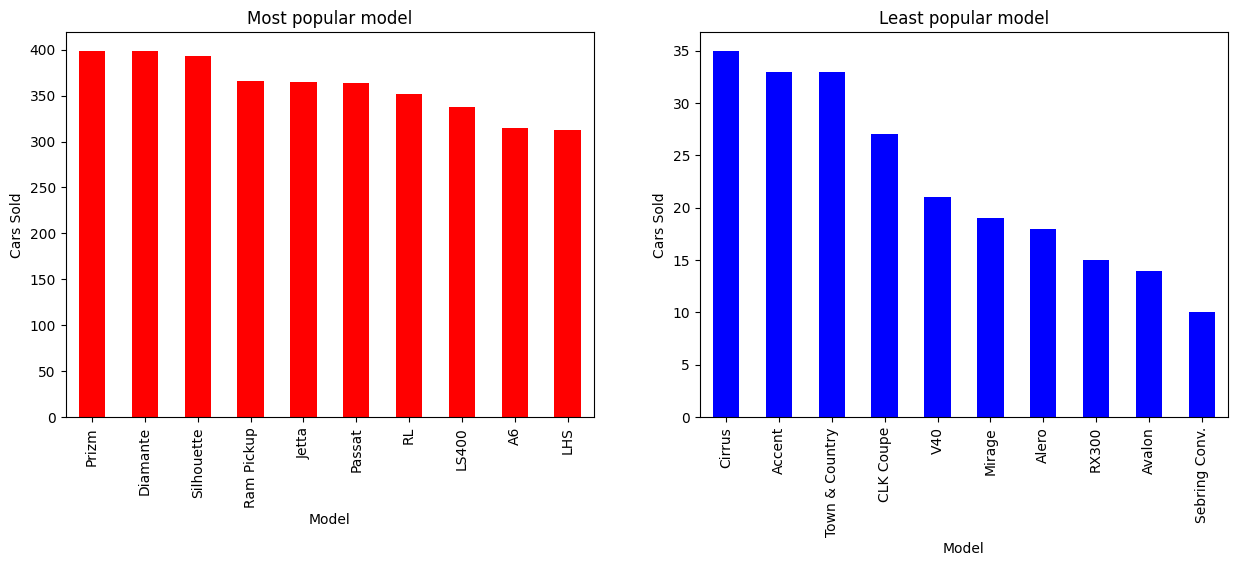

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

top_10 = df_adjusted["Model"].value_counts()[:10]
least_10 = df_adjusted["Model"].value_counts()[-10:]

top_10.plot(kind='bar', color='r', ax=ax[0])
ax[0].set_title('Most popular model')
ax[0].set_ylabel('Cars Sold')

least_10.plot(kind='bar', color='b', ax=ax[1])
ax[1].set_title('Least popular model')
ax[1].set_ylabel('Cars Sold')

### Most preferred model for Chevrolet?

In [31]:
for company, model in df_adjusted.groupby(by='Company')['Model']:
    if company == "Chevrolet":
        print(model.value_counts())

Model
Prizm          399
Metro          244
Corvette       238
Malibu         230
Cavalier       169
Lumina         157
Monte Carlo    142
Camaro         106
Impala          75
Name: count, dtype: int64


### Most preferred models for 8 companies

In [35]:
def donut(company):
    y = df_adjusted.loc[df_adjusted['Company'] == company, 'Model'].value_counts()
    x = y.index

    exp = [0.05] * len(x)

    plt.figure(figsize=(6, 6))
    plt.pie(y, labels = x, explode = exp, autopct = '%1.0f%%', pctdistance=0.85)

    # Create center circle for donut chart
    fig = plt.gcf()
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    plt.title(f"Most popular model for {company}")
    plt.show()

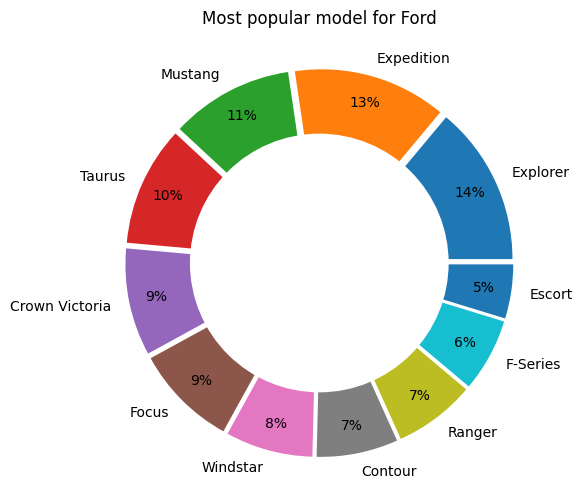

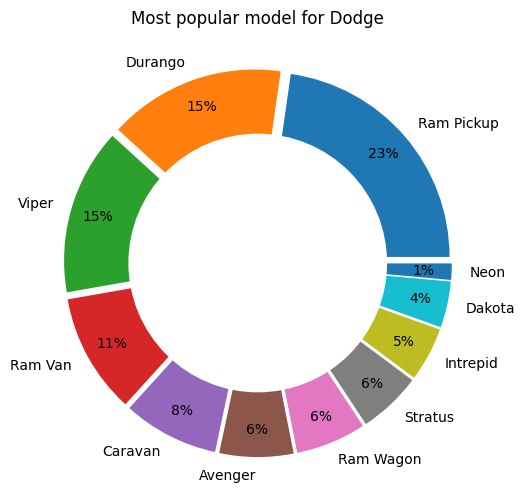

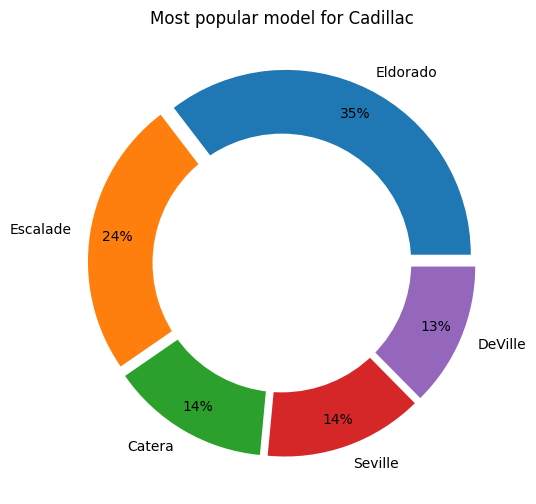

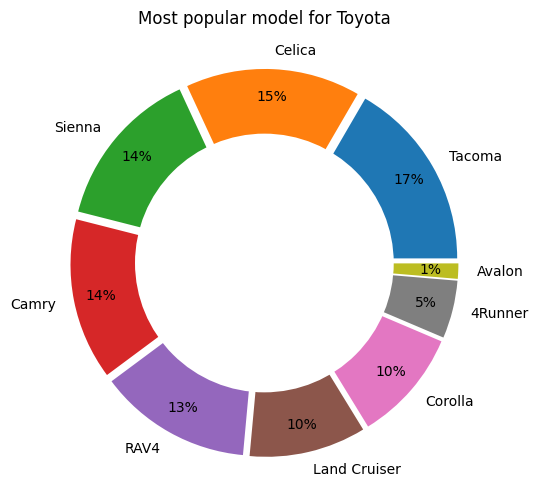

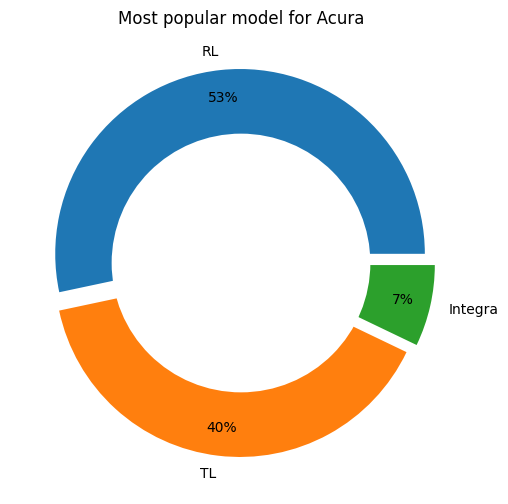

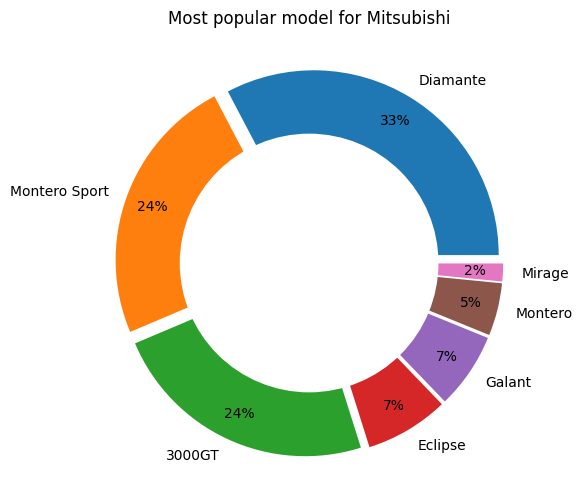

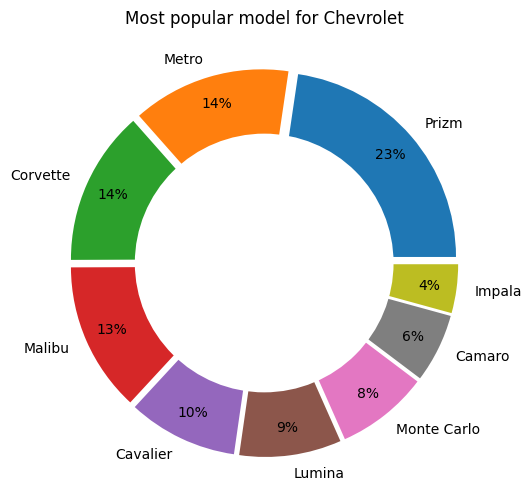

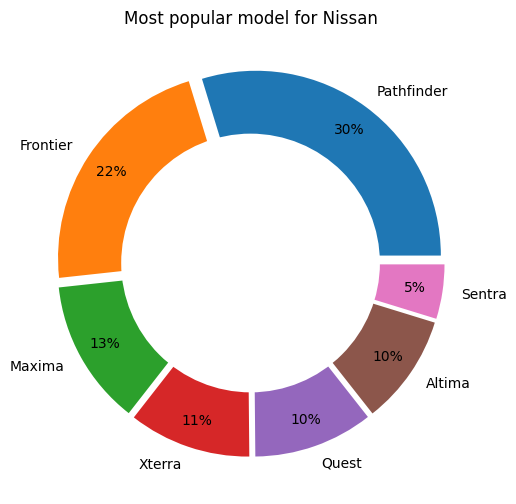

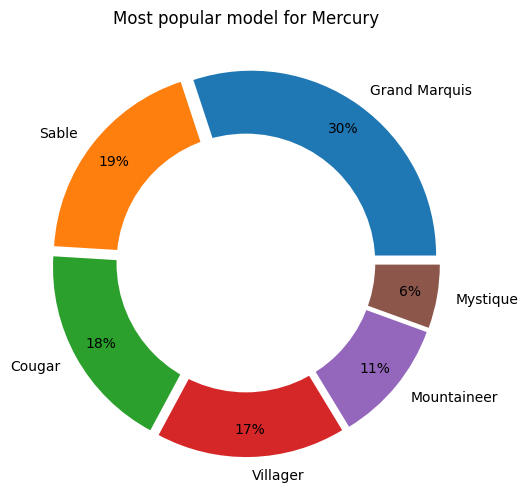

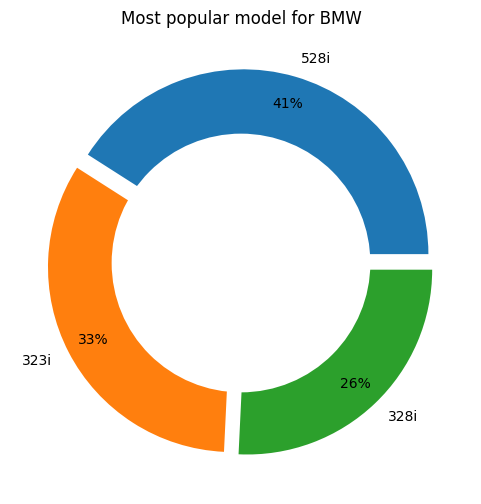

In [36]:
for c in df_adjusted["Company"].unique()[:8]:
    donut(c)

### Most popular Company by Gender?

<Axes: title={'center': 'Most popular car company among each gender'}, xlabel='Count', ylabel='Company'>

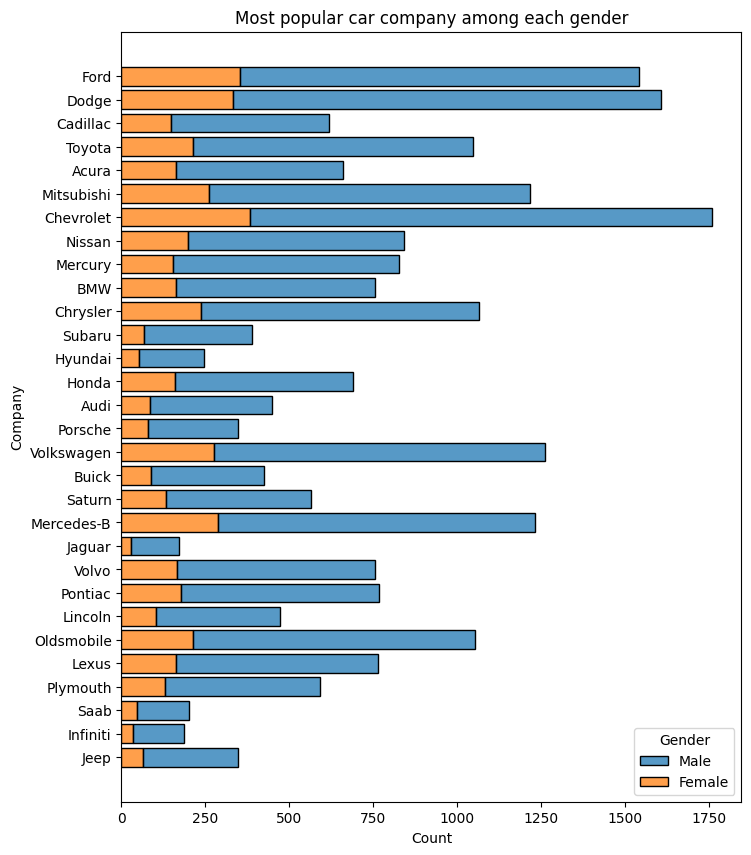

In [33]:
import seaborn.objects as so
plt.figure(figsize=(8, 10))
plt.title("Most popular car company among each gender")
sns.histplot(df_adjusted, y = "Company", hue="Gender", multiple="stack",shrink=.8)


In [34]:
print(f'Top 5 among Male are:\n{df_adjusted[df_adjusted["Gender"] == "Male"]["Company"].value_counts()[:5]}')
print()
print(f'Top 5 among Female are:\n{df_adjusted[df_adjusted["Gender"] == "Female"]["Company"].value_counts()[:5]}')

Top 5 among Male are:
Company
Chevrolet     1378
Dodge         1275
Ford          1190
Volkswagen     987
Mitsubishi     955
Name: count, dtype: int64

Top 5 among Female are:
Company
Chevrolet     382
Ford          354
Dodge         334
Mercedes-B    289
Volkswagen    276
Name: count, dtype: int64


Furthur exploration can be done on:
+ Dealerships
+ Which region prefer which brand/company
+ See the price of each car being sold over time for each company/models